In [2]:
#imporitng the required libraries
import pathlib
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.models import clone_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
from numpy import average
from numpy import array

In [3]:
covid_images = glob.glob('.\\curated dataset\\covid\\*')

In [4]:
len(covid_images)

597

In [5]:
normal_images = glob.glob('.\\curated dataset\\normal\\*')

In [6]:
len(normal_images)

616

In [7]:
pneumonia_images = glob.glob('.\\curated dataset\\pneumonia\\*')

In [8]:
len(pneumonia_images)

616

In [9]:
normal = []
for i in normal_images:
    path = i
    normal.append(path)

In [10]:
pneumonia = []
for i in pneumonia_images:
    path = i
    pneumonia.append(path)

In [11]:
covid = []
for i in covid_images:
    path = i
    covid.append(path)

In [12]:
all_images=[]

In [13]:
all_images.extend(normal)
all_images.extend(pneumonia)
all_images.extend(covid)

In [14]:
len(all_images)

1829

In [15]:
all_images[0].split('\\')

['.', 'curated dataset', 'normal', 'IM-0115-0001.jpeg']

In [56]:
# Define  labels[], and data[]
labels = []  
data = []
from tqdm import tqdm

for i in tqdm(range(len(all_images))):
    image= cv2.imread(all_images[i])  #reading the image
    image=cv2.resize(image, (224,224), interpolation = cv2.INTER_LINEAR) #resizing and interpolation
    image=cv2.medianBlur(image,5) #applying median filtering
    image=np.array(image)  #converting into numpy array
    image = image/255  #scaling image
    data.append(image)
    cls = all_images[i].split('\\')[-2] #splitting  path
    if cls == 'pneumonia':
        lbl = 0
    elif cls=='normal' :
        lbl=1
    else:
        lbl=2
    labels.append(lbl)

100%|██████████████████████████████████████████████████████████████████████████████| 1829/1829 [00:51<00:00, 35.68it/s]


In [57]:
labels=np.array(labels)
data=np.array(data)
print(labels.shape)
print(data.shape)

(1829,)
(1829, 224, 224, 3)


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train , x_test ,y_train ,y_test = train_test_split(data,labels,test_size=0.1)

In [60]:
x_train , x_val ,y_train ,y_val = train_test_split(data,labels,test_size=0.1)

In [61]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_val.shape,y_val.shape)

(1646, 224, 224, 3) (1646,)
(183, 224, 224, 3) (183,)
(183, 224, 224, 3) (183,)


In [62]:
#applying data augumentation using ImageGenerator library provided in keras.preprocessing on training data
data_generator = tf.keras.preprocessing.image.ImageDataGenerator( rotation_range=33, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)

In [63]:
y_train = tf.keras.utils.to_categorical(y_train,3)
y_test = tf.keras.utils.to_categorical(y_test,3)
y_val=tf.keras.utils.to_categorical(y_val,3)

In [24]:
IMG_SHAPE = (224,224,3)
batch_size = 8
epochs = 50

In [25]:
def create_model(base_model):
    base_model.trainable = False
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    prediction_layer = tf.keras.layers.Dense(3, activation='softmax')(global_average_layer)
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])
    return model

def fit_model(model):
    history = model.fit(data_generator.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_val, y_val))
    return history

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [26]:
base_model1 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model2 = tf.keras.applications.InceptionResNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model3 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

model1 = create_model(base_model1)
model2 = create_model(base_model2)
model3 = create_model(base_model3)

history1 = fit_model(model1)
model1.save('models/model1.h5')

history2 = fit_model(model2)
model2.save('models/model2.h5')

history3 = fit_model(model3)
model3.save('models/model3.h5')

Epoch 1/50
206/206 [==============================] - 18s 61ms/step - loss: 1.0983 - accuracy: 0.4550 - val_loss: 0.7650 - val_accuracy: 0.6995
Epoch 2/50
206/206 [==============================] - 11s 52ms/step - loss: 0.6198 - accuracy: 0.7761 - val_loss: 0.5462 - val_accuracy: 0.8142
Epoch 3/50
206/206 [==============================] - 11s 51ms/step - loss: 0.4335 - accuracy: 0.8753 - val_loss: 0.4730 - val_accuracy: 0.8142
Epoch 4/50
206/206 [==============================] - 11s 51ms/step - loss: 0.4011 - accuracy: 0.8637 - val_loss: 0.4027 - val_accuracy: 0.8251
Epoch 5/50
206/206 [==============================] - 11s 51ms/step - loss: 0.3734 - accuracy: 0.8713 - val_loss: 0.3623 - val_accuracy: 0.8525
Epoch 6/50
206/206 [==============================] - 11s 52ms/step - loss: 0.2936 - accuracy: 0.9061 - val_loss: 0.3601 - val_accuracy: 0.8361
Epoch 7/50
206/206 [==============================] - 11s 51ms/step - loss: 0.3089 - accuracy: 0.8873 - val_loss: 0.3051 - val_accuracy:

206/206 [==============================] - 13s 62ms/step - loss: 0.3314 - accuracy: 0.8818 - val_loss: 0.2899 - val_accuracy: 0.8852
Epoch 8/50
206/206 [==============================] - 13s 63ms/step - loss: 0.3442 - accuracy: 0.8703 - val_loss: 0.2297 - val_accuracy: 0.9508
Epoch 9/50
206/206 [==============================] - 13s 63ms/step - loss: 0.3028 - accuracy: 0.8834 - val_loss: 0.2308 - val_accuracy: 0.9344
Epoch 10/50
206/206 [==============================] - 13s 62ms/step - loss: 0.3034 - accuracy: 0.8915 - val_loss: 0.2253 - val_accuracy: 0.9344
Epoch 11/50
206/206 [==============================] - 13s 61ms/step - loss: 0.2931 - accuracy: 0.8954 - val_loss: 0.2184 - val_accuracy: 0.9344
Epoch 12/50
206/206 [==============================] - 13s 64ms/step - loss: 0.2929 - accuracy: 0.8871 - val_loss: 0.2309 - val_accuracy: 0.9071
Epoch 13/50
206/206 [==============================] - 13s 64ms/step - loss: 0.2859 - accuracy: 0.8900 - val_loss: 0.2019 - val_accuracy: 0.9617

206/206 [==============================] - 11s 53ms/step - loss: 0.2640 - accuracy: 0.8983 - val_loss: 0.1874 - val_accuracy: 0.9399
Epoch 14/50
206/206 [==============================] - 11s 53ms/step - loss: 0.2790 - accuracy: 0.8957 - val_loss: 0.1989 - val_accuracy: 0.9235
Epoch 15/50
206/206 [==============================] - 11s 53ms/step - loss: 0.2442 - accuracy: 0.9113 - val_loss: 0.1800 - val_accuracy: 0.9344
Epoch 16/50
206/206 [==============================] - 11s 53ms/step - loss: 0.2439 - accuracy: 0.9086 - val_loss: 0.1736 - val_accuracy: 0.9454
Epoch 17/50
206/206 [==============================] - 11s 53ms/step - loss: 0.2408 - accuracy: 0.9214 - val_loss: 0.1721 - val_accuracy: 0.9344
Epoch 18/50
206/206 [==============================] - 11s 53ms/step - loss: 0.2756 - accuracy: 0.8894 - val_loss: 0.1705 - val_accuracy: 0.9290
Epoch 19/50
206/206 [==============================] - 11s 53ms/step - loss: 0.2266 - accuracy: 0.9252 - val_loss: 0.1658 - val_accuracy: 0.93

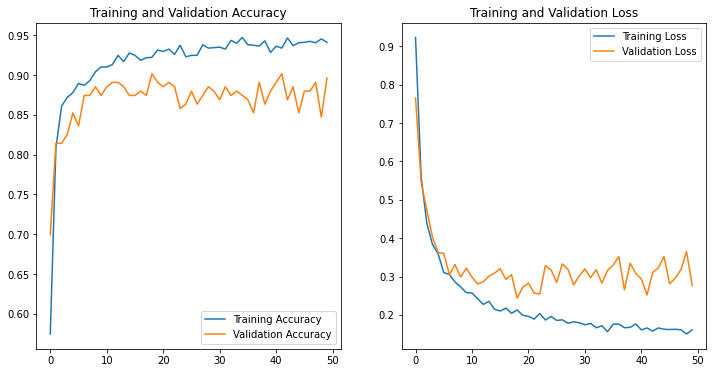

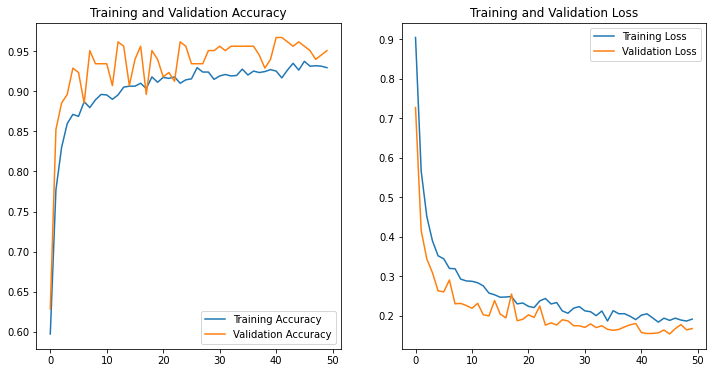

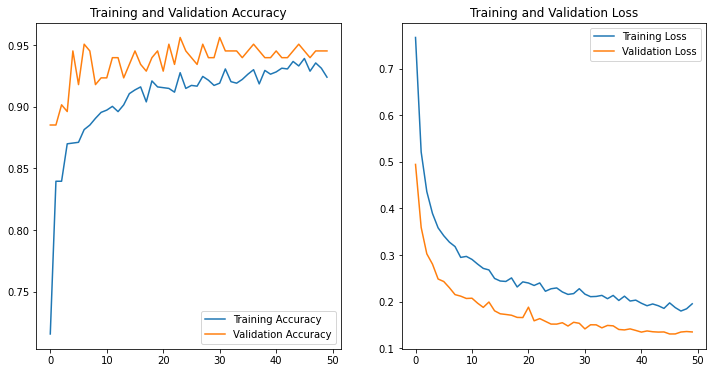

In [27]:
plot_history(history1)
plot_history(history2)
plot_history(history3)

In [64]:
def load_all_models():
    all_models = []
    model_names = ['model1.h5', 'model2.h5', 'model3.h5']
    for model_name in model_names:
        filename = os.path.join('models', model_name)
        model = tf.keras.models.load_model(filename)
        all_models.append(model)
        print('loaded:', filename)
    return all_models
models = load_all_models()
for i, model in enumerate(models):
    for layer in model.layers:
        layer.trainable = False

loaded: models\model1.h5
loaded: models\model2.h5
loaded: models\model3.h5


In [65]:
# def ensemble_model(models):
#     for i, model in enumerate(models):
#         for layer in model.layers:
#             layer.trainable = False
#     ensemble_visible = [model.input for model in models]
#     ensemble_outputs = [model.output for model in models]
#     merge = tf.keras.layers.concatenate(ensemble_outputs)
#     merge = tf.keras.layers.Dense(256, activation='relu')(merge)
#     output = tf.keras.layers.Dense(3, activation='softmax')(merge)
#     model = tf.keras.models.Model(inputs=ensemble_visible, outputs=output)
#     model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])
#     return model
ensemble_visible = [model.input for model in models]
ensemble_outputs = [model.output for model in models]
merge = tf.keras.layers.concatenate(ensemble_outputs)
merge = tf.keras.layers.Dense(256, activation='relu')(merge)
output = tf.keras.layers.Dense(3, activation='softmax')(merge)
model = tf.keras.models.Model(inputs=ensemble_visible, outputs=output)

In [66]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])

In [67]:
x_train = [x_train for _ in range(len(model.input))]
x_val = [x_val for _ in range(len(model.input))]
x_test = [x_test for _ in range(len(model.input))]

In [68]:
history = model.fit(x_train,y_train,batch_size=8,validation_data=(x_val,y_val),epochs=50)

Epoch 1/50
206/206 [==============================] - 36s 122ms/step - loss: 0.9581 - accuracy: 0.7472 - val_loss: 0.6359 - val_accuracy: 0.9399
Epoch 2/50
206/206 [==============================] - 21s 100ms/step - loss: 0.5441 - accuracy: 0.9462 - val_loss: 0.3713 - val_accuracy: 0.9454
Epoch 3/50
206/206 [==============================] - 21s 101ms/step - loss: 0.3129 - accuracy: 0.9552 - val_loss: 0.2459 - val_accuracy: 0.9508
Epoch 4/50
206/206 [==============================] - 21s 101ms/step - loss: 0.2182 - accuracy: 0.9567 - val_loss: 0.1903 - val_accuracy: 0.9563
Epoch 5/50
206/206 [==============================] - 21s 101ms/step - loss: 0.1489 - accuracy: 0.9712 - val_loss: 0.1625 - val_accuracy: 0.9563
Epoch 6/50
206/206 [==============================] - 21s 102ms/step - loss: 0.1398 - accuracy: 0.9579 - val_loss: 0.1486 - val_accuracy: 0.9508
Epoch 7/50
206/206 [==============================] - 21s 100ms/step - loss: 0.1204 - accuracy: 0.9672 - val_loss: 0.1409 - val_ac

In [69]:
model.save('models/model.h5')

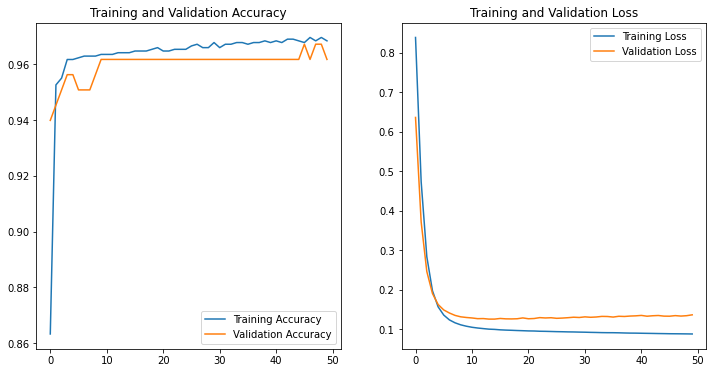

In [70]:
plot_history(history)

In [74]:
print('MobileNetV2 acc:', history1.history['accuracy'][-1])
print('InceptionResnetV2 acc:', history2.history['accuracy'][-1])
print('Xception acc:', history3.history['accuracy'][-1])
print('Ensemble acc:', history.history['accuracy'][-1])

MobileNetV2 acc: 0.9410692453384399
InceptionResnetV2 acc: 0.929526150226593
Xception acc: 0.9240583181381226
Ensemble acc: 0.9684082865715027


In [72]:
score, accuracy = model.evaluate(x_test,y_test)

6/6 [==============================] - 1s 216ms/step - loss: 0.0747 - accuracy: 0.9781


In [73]:
print("Testing Accuracy is : ", accuracy)

Testing Accuracy is :  0.9781420826911926


In [76]:
y_pred = model.predict(x_test)

In [77]:
y_test = np.argmax(y_test,axis=1)
y_pred = np.argmax(y_pred,axis=1)

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [82]:
print(classification_report(y_test,y_pred,target_names=['Pneumonia', 'Normal', 'Covid']))

              precision    recall  f1-score   support

   Pneumonia       1.00      0.94      0.97        64
      Normal       0.94      1.00      0.97        59
       Covid       1.00      1.00      1.00        60

    accuracy                           0.98       183
   macro avg       0.98      0.98      0.98       183
weighted avg       0.98      0.98      0.98       183



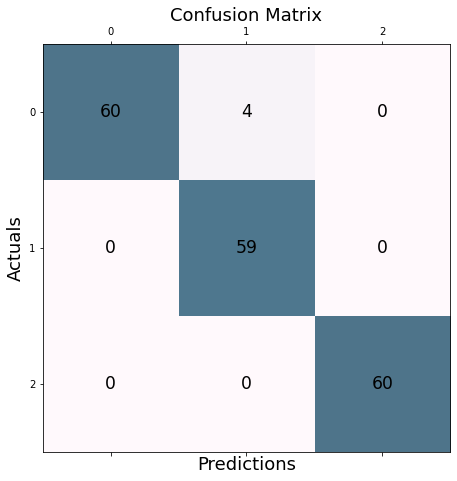

In [91]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.PuBu, alpha=0.7)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()